# Jose Tomas Lopez

I will investigate the decline of mid-range jump shots in the NBA. I will quantify and visualize the decline in mid range shooting volume by year throughout NBA history, specifically in the least decade. In addition, I want to examine mid range efficiency, and see if mid range shooters are getting less efficient, or if the decline in volume has nothing to do with players become less efficient. We can also compare the best mid-range shooters across eras, for example Michael Jordan compared to Demar Derozan. I want to examine and quantify how this trend away from mid-range shooting has impacted the game. Additionally, I want to find out if the mid-range shot is still helpful in basketball now and if it will even be relevant in the future.## Research question/interests


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.3)
plt.rc("axes.spines", top=False, right=False)

In [18]:
df = pd.read_csv("../data/processed/merged_cleaned.csv", index_col=[0],).loc[lambda x: x['player_name'].isin(['Michael Jordan', 'Demar Dozan',])]
[['player_name', 'season', 'two_pointers', 'three_point_percentage','games_played']]
# Filter data to exclude values of 0 and 1
df = df[(df['two_point_percentage'] != 0) & (df['two_point_percentage'] != 1)]

df
df2 = pd.read_csv("../data/processed/player_per_game_cleaned.csv", index_col=[0])

As seen through the data above, 

<AxesSubplot:xlabel='season', ylabel='field_goal_percentage'>

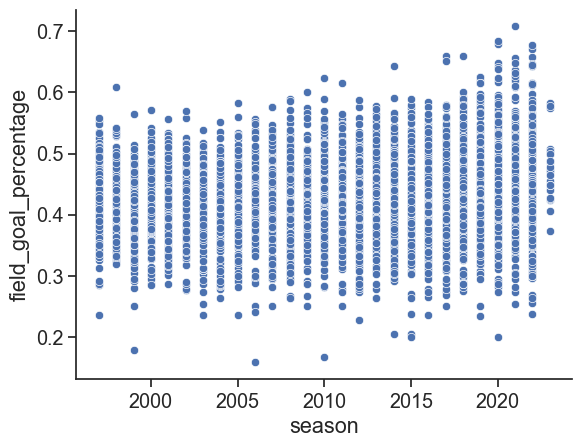

In [9]:
sns.scatterplot(data=df, x='season', y='field_goal_percentage',)

[Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Total Two Pointers'),
 Text(0.5, 1.0, 'Total Two Point Field Goals per Season')]

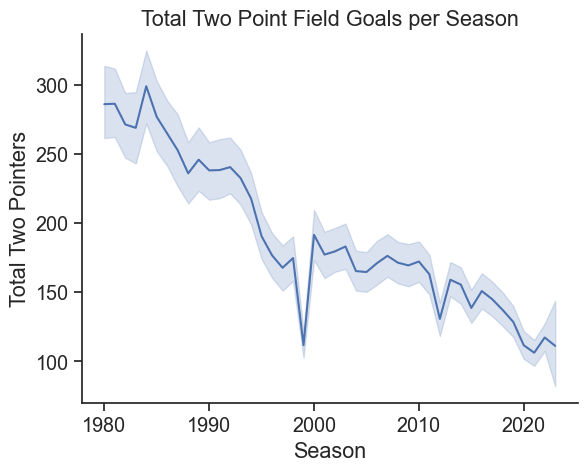

In [6]:
sns.lineplot(data=df, x='season', y='two_pointers',)\
   .set(xlabel='Season', ylabel='Total Two Pointers', 
        title='Total Two Point Field Goals per Season',)

The Two Point Field Goal, formerly the predominant shot in the NBA, has been surpassed in popularity by the advent of the three point line. According to the graph presented above, the average number of two-point shots attempted per season by all players has shown a consistent decline since 1980. Notably, the 1999-2000 season saw a significant reduction in the frequency of such shots, which can be attributed to a new wave of NBA players who were raised with an emphasis on three-point shooting.

[Text(0.5, 1.0, 'Change in Two Point Shot Percentage per Season'),
 Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Two Point Percentage')]

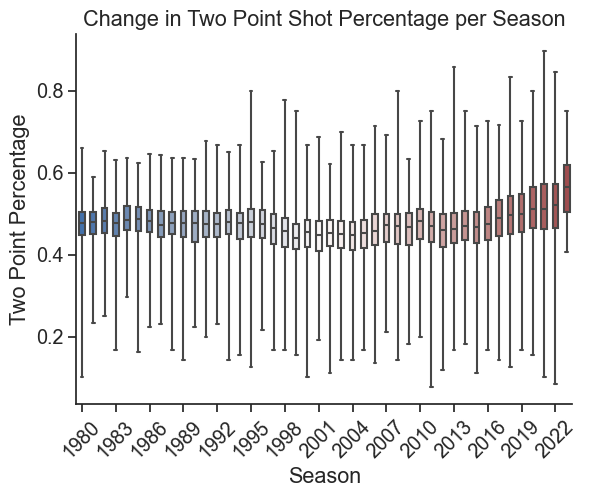

In [14]:
graph2=sns.boxplot(x="season", y="two_point_percentage", data=df, whis=[0, 100], width=.5, palette="vlag")
# Show every third season on x-axis
plt.xticks(rotation=45)
xticks = plt.gca().xaxis.get_major_ticks()
for i, tick in enumerate(xticks):
    if i % 3 != 0:
        tick.set_visible(False)
# Setting Title and Values under the Graph2 id.
graph2.set(title="Change in Two Point Shot Percentage per Season", xlabel="Season", ylabel="Two Point Percentage",)

[Text(0.5, 1.0, 'Change in Two Point Shot Percentage per Season'),
 Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Two Point Percentage')]

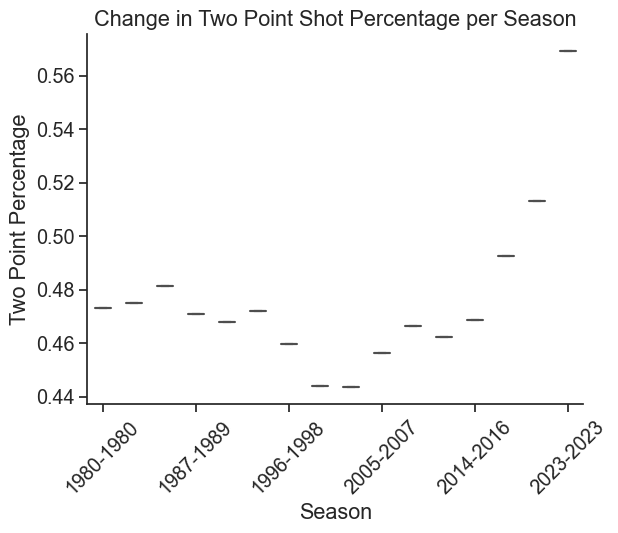

In [8]:
df_grouped = df.groupby((df['season']-1)//3*3)
graph2 = sns.boxplot(x=df_grouped['season'].min().astype(str) + '-' + df_grouped['season'].max().astype(str), 
                     y='two_point_percentage', 
                     data=df_grouped.mean(numeric_only=True), 
                     whis=[0, 100], 
                     width=.5, 
                     palette="vlag")

# Show every third season on x-axis
plt.xticks(rotation=45)
xticks = plt.gca().xaxis.get_major_ticks()
for i, tick in enumerate(xticks):
    if i % 3 != 0:
        tick.set_visible(False)

# Setting Title and Values under the Graph2 id.
graph2.set(title="Change in Two Point Shot Percentage per Season",
           xlabel="Season", ylabel="Two Point Percentage")

In [ ]:
errorbar=none

/var/folders/p0/vwbfd4hn6vx0wb05w2cgy31w0000gn/T/ipykernel_5700/1649391134.py:17: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2) \


Stat,Count,Mean,Std Dev,Min,Q1,Median,Q3,Max
Player,,,,,,,,
Michael Jordan,15,29.45,4.76,20,27.55,30.10,32.55,37


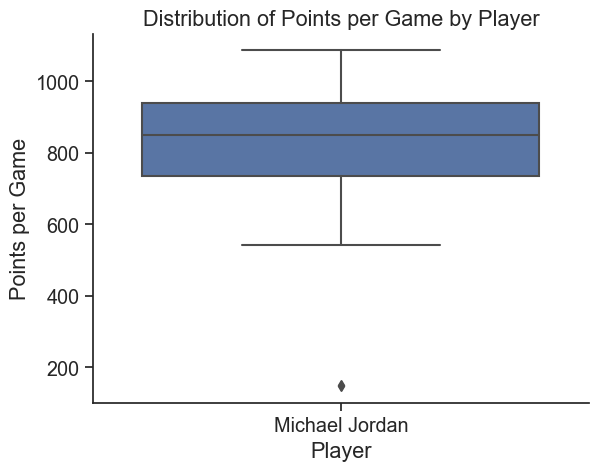

In [19]:
# create boxplot using seaborn
sns.boxplot(data=df, x='player_name', y='two_pointers')
plt.title('Distribution of Points per Game by Player')
plt.ylabel('Points per Game')
plt.xlabel('Player')

# use groupby and describe to create table
stats = df.groupby('player_name')['points_per_game'] \
    .describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']] \
    .rename(columns={'count': 'Count', 'mean': 'Mean', 'std': 'Std Dev', 
                     'min': 'Min', '25%': 'Q1', '50%': 'Median', '75%': 'Q3', 'max': 'Max'})

# format table for better readability
stats.index.name = 'Player'
stats.columns.name = 'Stat'
stats.style.set_caption('Descriptive Statistics for Points per Game by Player') \
    .set_precision(2) \
    .format('{:.2f}', subset=['Mean', 'Std Dev', 'Q1', 'Median', 'Q3']) \
    .format('{:.0f}', subset=['Count', 'Min', 'Max']) \
    .set_table_styles([{'selector': 'caption', 'props': [('font-size', '16px'), 
                                                         ('color', 'blue')]}])

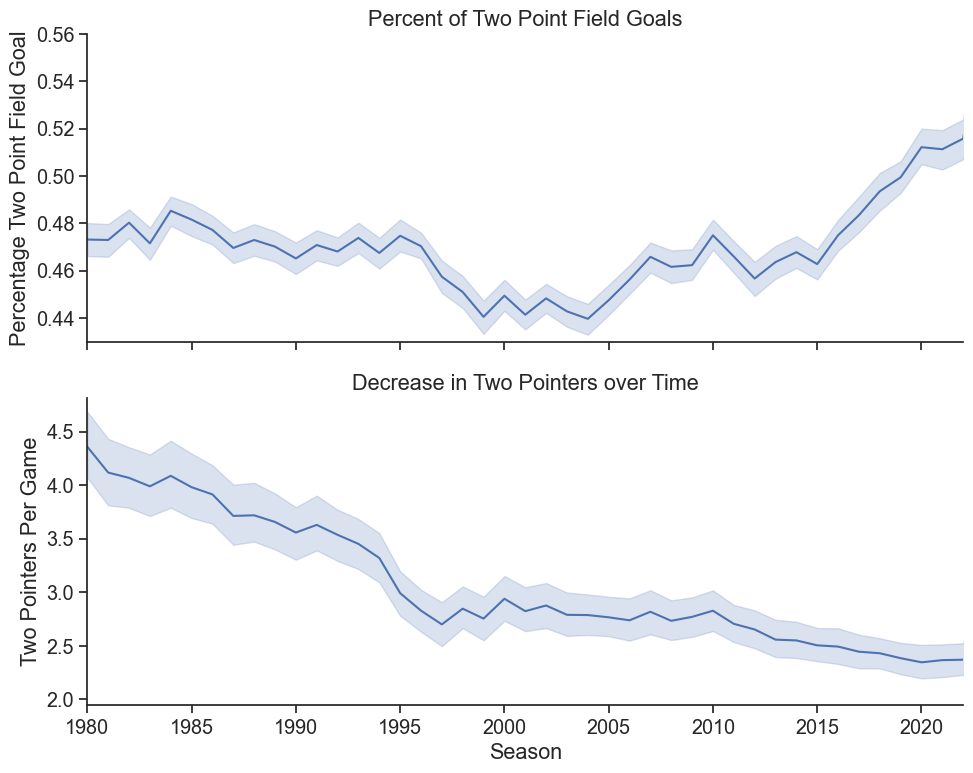

In [37]:

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8), sharex=True)

# Plot first lineplot on first subplot
sns.lineplot(data=df, x='season', y='two_point_percentage', ax=ax1)\
   .set(xlabel='', ylabel='Percentage Two Point Field Goal', 
        title='Percent of Two Point Field Goals', ylim=(0.43, 0.56))

# Plot second lineplot on second subplot
sns.lineplot(data=df, x='season', y='two_pointers_per_game', ax=ax2)\
   .set(xlabel='Season', ylabel='Two Pointers per Game', 
        title='Decrease in Two Pointers Over Time per Game', xlim=(1980, 2022))

# Show the plot
plt.tight_layout()
plt.show()

The graphs displayed above provide an insight into the average number of Two Pointer shots attempted in different seasons of the NBA and the differences in the success rate of these shots. As depicted in the diagrams, there has been a consistent decline in the number of Two Pointer shots made by each player since the introduction of the three-point line in 1979-1980. As a result, there has been a reduction in the overall percentage of successful Two Pointer shots, with a notable improvement in the middle of the 2000 and 2005 seasons. These findings suggest that while most players have shifted their focus towards three-point shots, those specializing in Two Pointer shots are honing the necessary skills, leading to more tremendous success and efficiency in their shots.